# Linear Regression

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
# collecting the data
bos_data = pd.read_csv('BostonHousing.csv')
bos_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
X = bos_data.iloc[:,0:13]
Y = bos_data['medv']
X.head()  # only input data i.e Independent variable

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [14]:
Y.head() # Dependent variable i.e Known O/P Data

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [15]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(X,Y,test_size=0.30,
                                                    random_state=5)

In [22]:
# using the model
from sklearn.linear_model import LinearRegression

# instantiate the model
lr_model = LinearRegression()

# train the model
lr_model.fit(x_train, y_train)
print(x_test)
# testing or prediction
y_pred = lr_model.predict(x_test)

# compare the house price predicted vs known test value
data = {'predicted O/P':y_pred,'known(testing) O/P':y_test}
pd.DataFrame(data)

         crim    zn  indus  chas     nox     rm    age      dis  rad  tax  \
226   0.38214   0.0   6.20     0  0.5040  8.040   86.5   3.2157    8  307   
292   0.03615  80.0   4.95     0  0.4110  6.630   23.4   5.1167    4  245   
90    0.04684   0.0   3.41     0  0.4890  6.417   66.1   3.0923    2  270   
373  11.10810   0.0  18.10     0  0.6680  4.906  100.0   1.1742   24  666   
273   0.22188  20.0   6.96     1  0.4640  7.691   51.8   4.3665    3  223   
417  25.94060   0.0  18.10     0  0.6790  5.304   89.1   1.6475   24  666   
503   0.06076   0.0  11.93     0  0.5730  6.976   91.0   2.1675    1  273   
234   0.44791   0.0   6.20     1  0.5070  6.726   66.5   3.6519    8  307   
111   0.10084   0.0  10.01     0  0.5470  6.715   81.6   2.6775    6  432   
472   3.56868   0.0  18.10     0  0.5800  6.437   75.0   2.8965   24  666   
99    0.06860   0.0   2.89     0  0.4450  7.416   62.5   3.4952    2  276   
339   0.05497   0.0   5.19     0  0.5150  5.985   45.4   4.8122    5  224   

,predicted O/P,known(testing) O/P
226,37.389977,37.6
292,31.567942,27.9
90,27.133739,22.6
373,6.551176,13.8
273,33.693108,35.2
417,5.549194,10.4
503,27.100056,23.9
234,29.829810,29.0
111,26.446224,22.8
472,22.388735,23.2


In [17]:
lr_model.coef_

array([-1.54486040e-01,  4.13948217e-02, -2.53765225e-02,  7.86055259e-01,
       -1.29365836e+01,  4.03952301e+00, -1.05354914e-02, -1.33498644e+00,
        3.18272501e-01, -1.26427463e-02, -9.77287564e-01,  1.26714702e-02,
       -4.62052176e-01])

In [18]:
lr_model.intercept_

31.730351296497858

In [19]:
#Y(HP) = 36.01 + -1.2323.crim + 6.2152.zn + 3.136320.indus	chas	nox	rm	age	dis	rad	tax	ptratio	b	lstat
#lr_model.predict()


In [20]:
import seaborn as sns
import pandas as pd
bos_data = pd.read_csv('BostonHousing.csv')
X = bos_data.iloc[:,0:13]
correlation = X.corr()
correlation

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


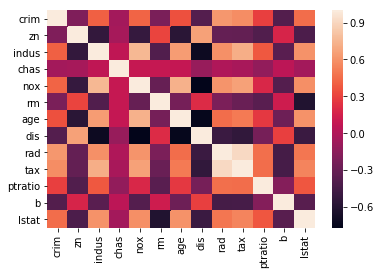

In [21]:
# draw a heatmap for corrrelation
import matplotlib.pyplot as plt
sns.heatmap(correlation)
plt.show()

In [37]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
#a,b,c,d = train_test_split(X,Y,test_size=0.30,random_state=5)
# x_train, x_test, y_train, y_test 


train, test = train_test_split(bos_data,test_size=0.30,random_state=5)
print(train)


         crim    zn  indus  chas     nox     rm    age      dis  rad  tax  \
445  10.67180   0.0  18.10     0  0.7400  6.459   94.8   1.9879   24  666   
428   7.36711   0.0  18.10     0  0.6790  6.193   78.1   1.9356   24  666   
481   5.70818   0.0  18.10     0  0.5320  6.750   74.9   3.3317   24  666   
55    0.01311  90.0   1.22     0  0.4030  7.249   21.9   8.6966    5  226   
488   0.15086   0.0  27.74     0  0.6090  5.454   92.7   1.8209    4  711   
250   0.14030  22.0   5.86     0  0.4310  6.487   13.0   7.3967    7  330   
3     0.03237   0.0   2.18     0  0.4580  6.998   45.8   6.0622    3  222   
227   0.41238   0.0   6.20     0  0.5040  7.163   79.9   3.2157    8  307   
450   6.71772   0.0  18.10     0  0.7130  6.749   92.6   2.3236   24  666   
199   0.03150  95.0   1.47     0  0.4030  6.975   15.3   7.6534    3  402   
48    0.25387   0.0   6.91     0  0.4480  5.399   95.3   5.8700    3  233   
281   0.03705  20.0   3.33     0  0.4429  6.968   37.2   5.2447    5  216   

In [28]:
"""
in java or in some other languages functions can return
only one value...my point is
ask whether in python functions can return multiple values?
"""

'\nin java or in some other languages functions can return\nonly one value...my point is\nask whether in python functions can return multiple values?\n'

In [30]:
def func():
    return 1,2,3,4
a,b,c,d = func()
print(a)
print(b)
print(c)
print(d)

1
2
3
4


In [31]:
a,b = func()
print(a)
prin(b)

ValueError: too many values to unpack (expected 2)

In [32]:
x = (1,2,3,4)
i,j,k,l = x
i

1

In [33]:
j

2

In [34]:
k

3

In [35]:
l

4

In [36]:
x = (1,2,3,4)
i,j = x

ValueError: too many values to unpack (expected 2)

In [ ]:
"hello python".split()